In [1]:
%pip install pandas_datareader
%pip install datetime
%pip install mplfinance
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### ライブラリ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_datareader as pdr
from datetime import datetime as dt
import yfinance as yf
import mplfinance as mpf

### データ取得（Yahoo! Financeより）とデータ整形

In [3]:
start = dt(2020, 1, 1)
end = dt.today()

# Nintendo (NTDOY) の株価を Yahoo! Finance から取得
ntdoy_df = yf.download('7974.T', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
ntdoy_df.shape

(1179, 6)

In [5]:
ntdoy_df.sort_index(ascending=False).head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,7974.T,7974.T,7974.T,7974.T,7974.T,7974.T
Date,,,,,,
2024-10-29 00:00:00+00:00,8141.0,8141.0,8186.0,8087.0,8130.0,1991700
2024-10-28 00:00:00+00:00,8160.0,8160.0,8219.0,8014.0,8020.0,3595900
2024-10-25 00:00:00+00:00,8002.0,8002.0,8068.0,7979.0,8066.0,1962700
2024-10-24 00:00:00+00:00,8069.0,8069.0,8103.0,7978.0,8036.0,2711600
2024-10-23 00:00:00+00:00,8078.0,8078.0,8117.0,8049.0,8063.0,3147800


In [6]:
ntdoy_df = ntdoy_df.stack().reset_index().drop('Ticker', axis=1)
ntdoy_df.name=None
ntdoy_df.head()

C:\Users\kouki\AppData\Local\Temp\ipykernel_11996\1038590022.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  ntdoy_df = ntdoy_df.stack().reset_index().drop('Ticker', axis=1)


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-06 00:00:00+00:00,3670.031982,4274.0,4309.0,4251.0,4301.0,11546000
1,2020-01-07 00:00:00+00:00,3687.206055,4294.0,4350.0,4289.0,4304.0,11676000
2,2020-01-08 00:00:00+00:00,3661.445068,4264.0,4284.0,4161.0,4250.0,14844000
3,2020-01-09 00:00:00+00:00,3724.988770,4338.0,4360.0,4316.0,4355.0,10308000
4,2020-01-10 00:00:00+00:00,3730.140381,4344.0,4378.0,4314.0,4322.0,8263000


### グラフ描画

#### 終値の折れ線グラフ

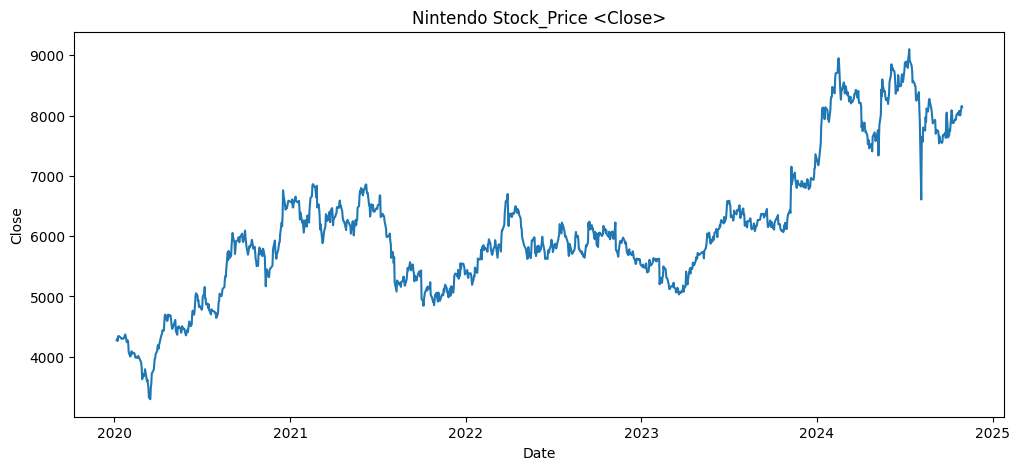

In [7]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=ntdoy_df['Date'], y=ntdoy_df['Close'])
plt.title('Nintendo Stock_Price <Close>')
plt.show()

#### ろうそく足

<Figure size 1200x500 with 0 Axes>

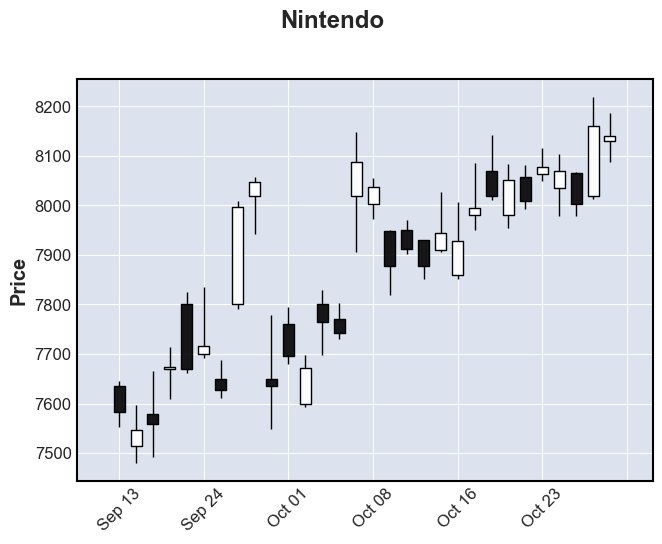

In [8]:
plt.figure(figsize=(12, 5))
mpf.plot(ntdoy_df.set_index('Date')[-30:], type='candle', #直近30日分
title='Nintendo')


#### 移動平均線（7日、14日、30日、100日）

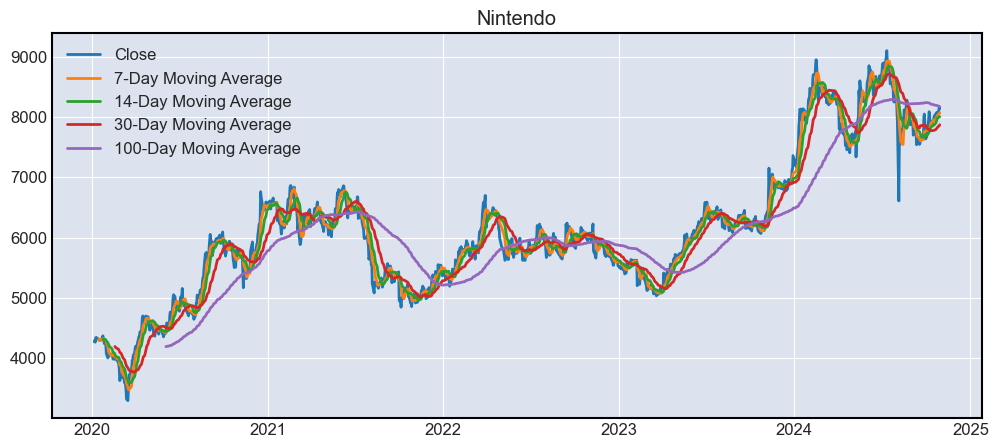

In [9]:
ntdoy_df['Moving_Average_7days'] = ntdoy_df['Close'].rolling(7).mean()
ntdoy_df['Moving_Average_14days'] = ntdoy_df['Close'].rolling(14).mean()
ntdoy_df['Moving_Average_30days'] = ntdoy_df['Close'].rolling(30).mean()
ntdoy_df['Moving_Average_100days'] = ntdoy_df['Close'].rolling(100).mean()
plt.figure(figsize=(12, 5))
plt.plot(ntdoy_df['Date'], ntdoy_df['Close'], label='Close')
plt.plot(ntdoy_df['Date'], ntdoy_df['Moving_Average_7days'], label='7-Day Moving Average')
plt.plot(ntdoy_df['Date'], ntdoy_df['Moving_Average_14days'], label='14-Day Moving Average')
plt.plot(ntdoy_df['Date'], ntdoy_df['Moving_Average_30days'], label='30-Day Moving Average')
plt.plot(ntdoy_df['Date'], ntdoy_df['Moving_Average_100days'], label='100-Day Moving Average')
plt.title('Nintendo')
plt.legend()
plt.show()

##### 拡大版

KeyError: 'Moving_#表示日数Average_30days'

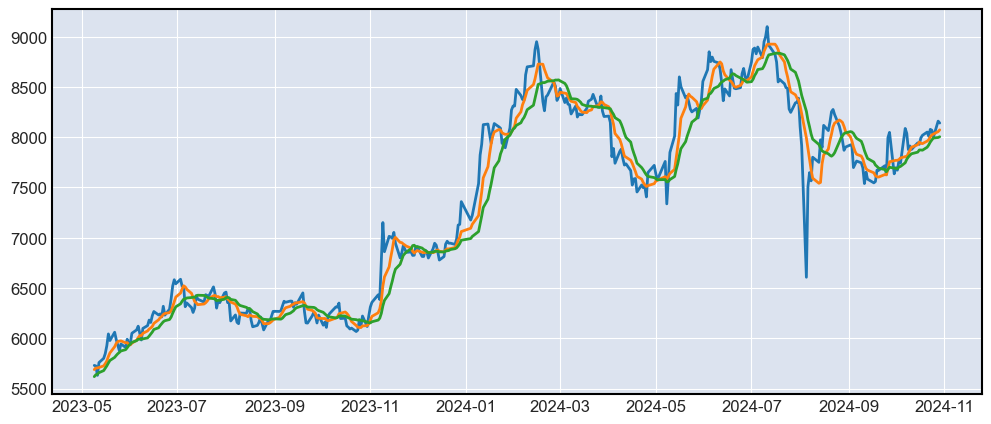

In [ ]:
plt.figure(figsize=(12, 5))
days=365  
plt.plot(ntdoy_df['Date'][-days:], ntdoy_df['Close'][-days:])
plt.plot(ntdoy_df['Date'][-days:], ntdoy_df['Moving_Average_7days'][-days:], label='7-Day Moving Average')
plt.plot(ntdoy_df['Date'][-days:], ntdoy_df['Moving_Average_14days'][-days:], label='14-Day Moving Average')
plt.plot(ntdoy_df['Date'][-days:], ntdoy_df['Moving_Average_30days'][-days:], label='30-Day Moving Average')
plt.plot(ntdoy_df['Date'][-days:], ntdoy_df['Moving_Average_100days'][-days:], label='100-Day Moving Average')
plt.title('Nintendo')
plt.legend()
plt.show()

In [141]:
start = dt(2022, 1, 1).date()
end = dt(2023, 1, 1).date()
ntdoy_date = pd.DataFrame(ntdoy_df['Date'].dt.date)
ntdoy_date['Date'][(ntdoy_date['Date']>start) & (ntdoy_date['Date']<end)]

487    2022-01-04
488    2022-01-05
489    2022-01-06
490    2022-01-07
491    2022-01-11
          ...    
726    2022-12-26
727    2022-12-27
728    2022-12-28
729    2022-12-29
730    2022-12-30
Name: Date, Length: 244, dtype: object

### 関数化

In [245]:
def get_stock_price(ticker, start, end=None):
    if end is None:
        end = dt.today()

    print(f'Start_date : {start.date()}\nEnd_date : {end.date()}')

    return_df = yf.download(ticker, start=start, end=end)
    return_df = return_df.stack(future_stack=True).reset_index()

    print(f'Days : {return_df.shape[0]}')

    return return_df

def draw_graphs(df, start, start_candle, end=None, data='Close', moving_avelage=[7, 14, 30, 100], end_candle=None):
    name=df['Ticker'][0]
    print(name)
    if end is None:
        end = dt.today()

    if end_candle is None:
        end_candle = dt.today()

    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    data_for_draw = df[(df['Date'].dt.date>start.date()) & (df['Date'].dt.date<end.date())].drop('Ticker', axis=1)
    data_for_draw_candle = df[(df['Date'].dt.date>start_candle.date()) & (df['Date'].dt.date<end_candle.date())].drop('Ticker', axis=1)
    


    #ろうそく足
    mpf.plot(data_for_draw_candle.set_index('Date') , type='candle', ax=axes[0])
    axes[0].set_title(f'{name} <{data}-candle>')

    #移動平均
    axes[1].plot(df['Date'], df[data], label=f'{data}')
    axes[2].plot(data_for_draw['Date'], data_for_draw[data], label=f'{data}')
    for i in range(len(moving_avelage)):
        days=moving_avelage[i]
        df[f'moving_average_{days}'] = df[data].rolling(days).mean()
        data_for_draw = df[(df['Date'].dt.date>start.date()) & (df['Date'].dt.date<end.date())].drop('Ticker', axis=1)
        axes[1].plot(df['Date'], df[f'moving_average_{days}'], label=f'{days}-Days Moving Average')
        axes[2].plot(data_for_draw['Date'], data_for_draw[f'moving_average_{days}'], label=f'{days}-Days Moving Average')
    
    axes[1].set_title(f'{name} <{data}_all>')
    axes[2].set_title(f'{name} <{data} <{start.date()} to {end.date()}>')
    axes[1].legend()
    axes[2].legend()
    plt.tight_layout()




In [241]:
start=dt(2021, 1, 1)
toyota_df = get_stock_price('7203.T', start)

Start_date : 2021-01-01
End_date : 2024-10-22


[*********************100%***********************]  1 of 1 completed

Days : 932


7203.T


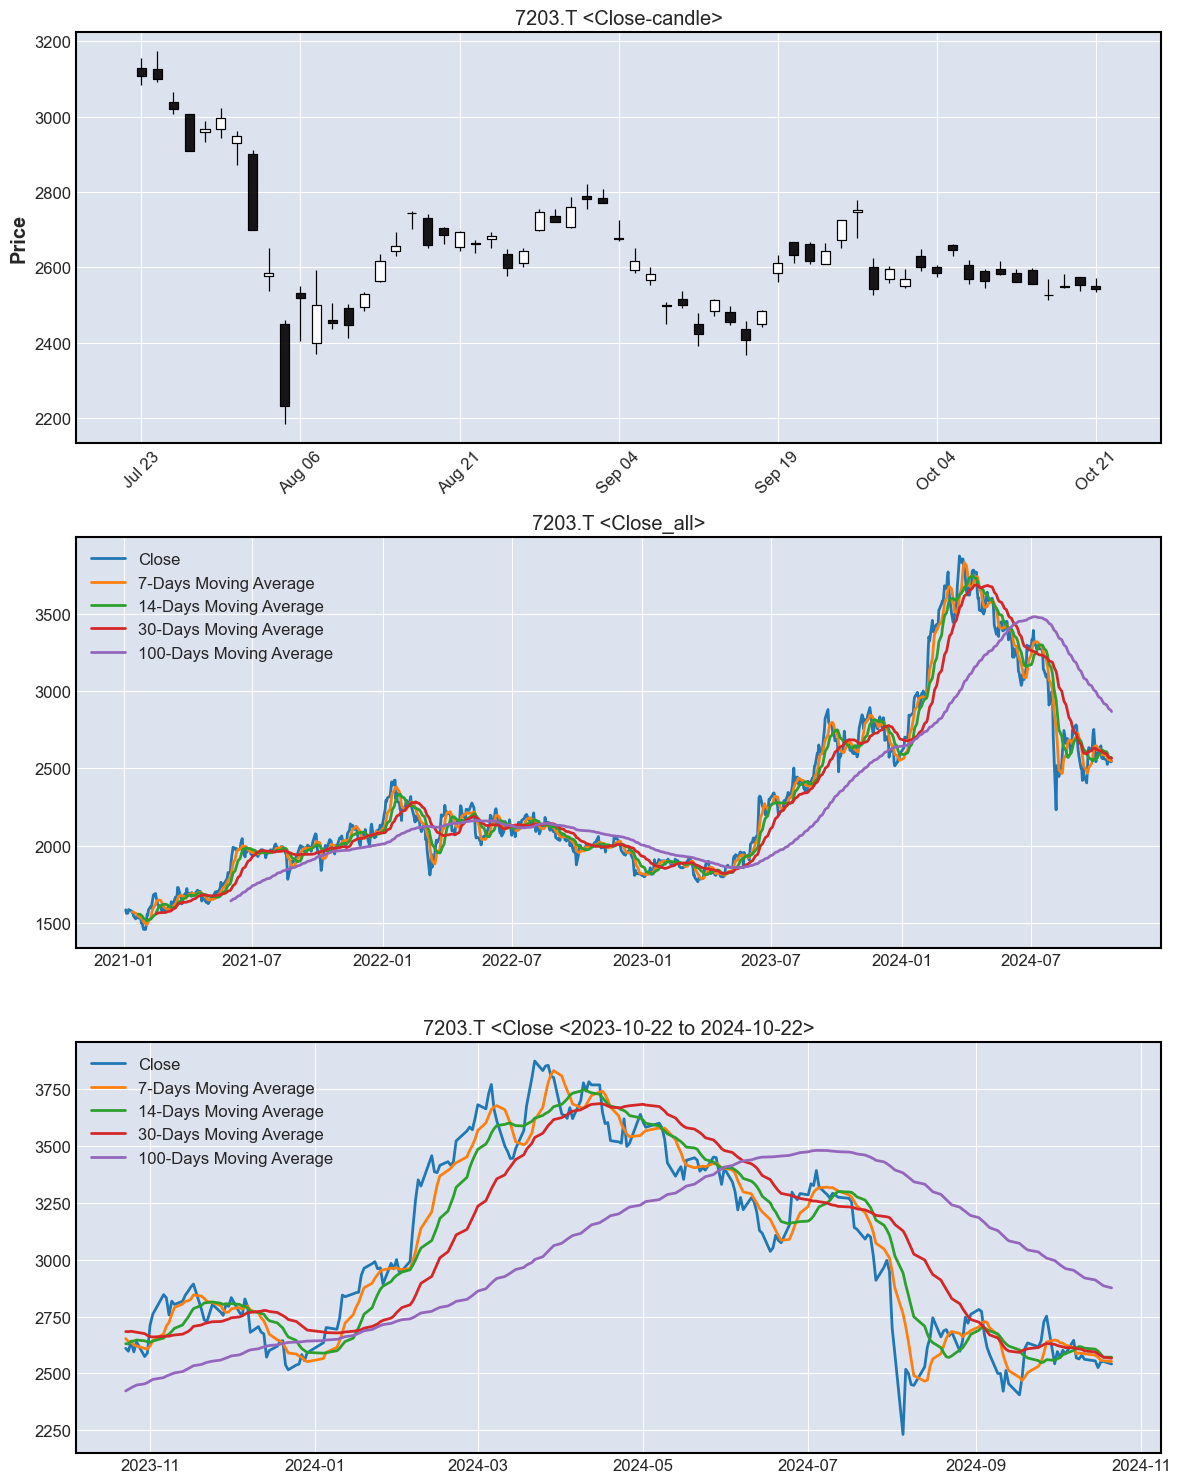

In [242]:
draw_graphs(toyota_df, dt(2023, 10, 22), dt(2024, 7, 22))

Start_date : 2020-10-22
End_date : 2024-10-22


[*********************100%***********************]  1 of 1 completed


Days : 1005
GOOG


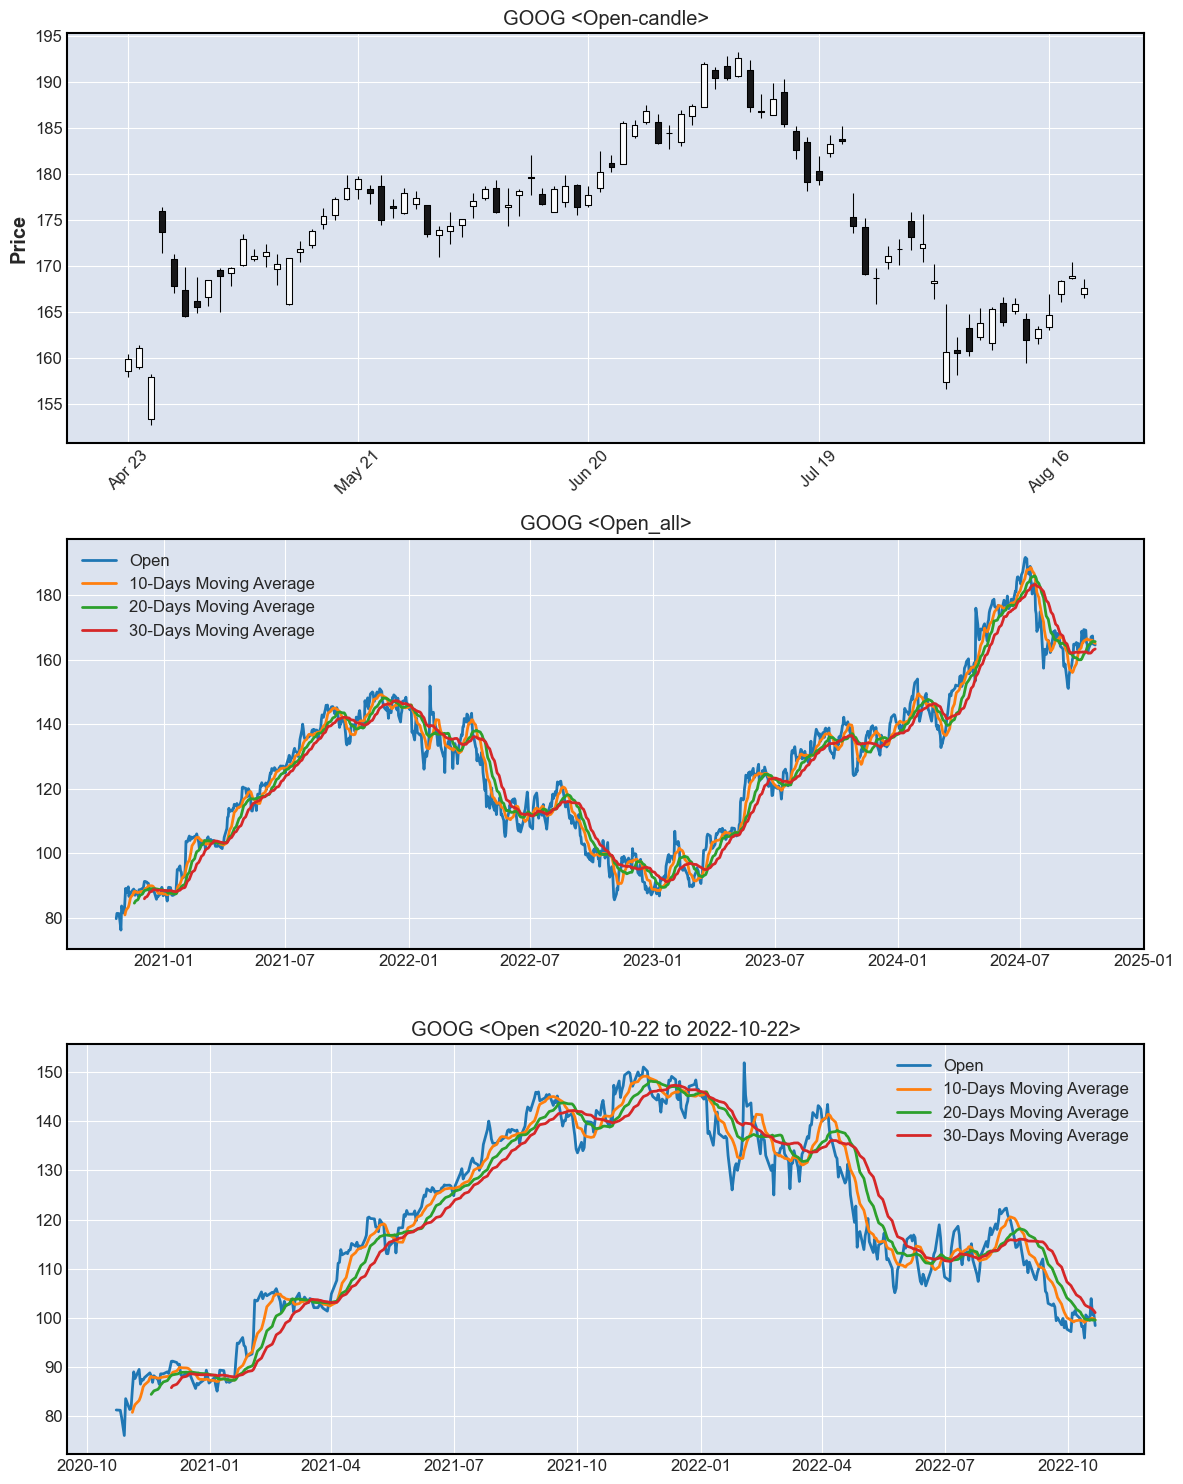

In [248]:
draw_graphs(get_stock_price('GOOG', dt(2020, 10, 22)), dt(2020, 10, 22), dt(2024, 4, 22), moving_avelage=[10, 20, 30], 
data='Open', end=dt(2022, 10, 22), end_candle=dt(2024, 8, 22))

### 財務データ（EDINET)

In [253]:
pip install requests


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import requests

# APIエンドポイント
api_url = 'https://disclosure.edinet-fsa.go.jp/api/v2/documents.json'

# パラメータ（例: 企業コードや提出日）
params = {
    'date': '2023-05-17',  # 提出日
    'type': 2,             # 提出書類の種類（有価証券報告書など）
    "Subscription-Key":"5c09c7cab09f4d98b34aa3f247f7e36d"
}

# APIリクエスト
response = requests.get(api_url, params=params)

# レスポンスの確認
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error:", response.status_code)

{'metadata': {'title': '提出された書類を把握するためのAPI', 'parameter': {'date': '2023-05-17', 'type': '2'}, 'resultset': {'count': 150}, 'processDateTime': '2024-10-29 00:03', 'status': '200', 'message': 'OK'}, 'results': [{'seqNumber': 1, 'docID': 'S100QNWL', 'edinetCode': 'E12444', 'secCode': None, 'JCN': '8010001114914', 'filerName': '三井住友トラスト・アセットマネジメント株式会社', 'fundCode': 'G10124', 'ordinanceCode': '030', 'formCode': '07A000', 'docTypeCode': '120', 'periodStart': '2022-08-18', 'periodEnd': '2023-02-17', 'submitDateTime': '2023-05-17 09:00', 'docDescription': '有価証券報告書（内国投資信託受益証券）－第19期(2022/08/18－2023/02/17)', 'issuerEdinetCode': None, 'subjectEdinetCode': None, 'subsidiaryEdinetCode': None, 'currentReportReason': None, 'parentDocID': None, 'opeDateTime': None, 'withdrawalStatus': '0', 'docInfoEditStatus': '0', 'disclosureStatus': '0', 'xbrlFlag': '1', 'pdfFlag': '1', 'attachDocFlag': '1', 'englishDocFlag': '0', 'csvFlag': '1', 'legalStatus': '1'}, {'seqNumber': 2, 'docID': 'S100QRM6', 'edinetCode

In [15]:
documents = data['results']
df = pd.DataFrame(documents)

# 特定のカラムだけを選択
df_filtered = df[['docID', 'secCode','edinetCode', 'filerName', 'docDescription', 'submitDateTime']]

# 決算情報のみをフィルタリング
df_financial = df_filtered[df_filtered['docDescription'].str.contains('有価証券報告書', na=False)]

#### 西松屋

In [48]:
import urllib.request
import sys

# APIキーの設定
api_key = '5c09c7cab09f4d98b34aa3f247f7e36d'

docIDs = []
# ドキュメントのダウンロード
for index, doc in df_financial[23:].iterrows():
    docID = doc['docID']
    url = f'https://api.edinet-fsa.go.jp/api/v2/documents/{docID}?type=5&Subscription-Key={api_key}'
    
    print(doc['edinetCode'], doc['docID'], doc['filerName'], doc['docDescription'], doc['submitDateTime'], sep='\t')

    docIDs.append(docID)
    try:
        # ZIPファイルのダウンロード
        with urllib.request.urlopen(url) as res:
            content = res.read()
        output_path = f'{docID}.zip'
        with open(output_path, 'wb') as file_out:
            file_out.write(content)
    except urllib.error.HTTPError as e:
        if e.code >= 400:
            sys.stderr.write(e.reason + '\n')
        else:
            raise e

E08957	S100QMAP	三井住友ＤＳアセットマネジメント株式会社	有価証券報告書（内国投資信託受益証券）－第40期(2022/08/23－2023/02/20)	2023-05-17 09:55
E08957	S100QK1M	三井住友ＤＳアセットマネジメント株式会社	有価証券報告書（内国投資信託受益証券）－第16期(2022/08/23－2023/02/20)	2023-05-17 09:56
E26746	S100QRTK	グローバル・ファンズ・トラスト・カンパニー	有価証券報告書（外国投資信託受益証券）－第11期(2021/11/18－2022/11/17)	2023-05-17 10:00
E03287	S100QRRO	株式会社西松屋チェーン	有価証券報告書－第67期(2022/02/21－2023/02/20)	2023-05-17 10:06
E37220	S100QMRB	ＹＣＰホールディングス（グローバル）リミテッド	有価証券報告書－第2期(2022/01/01－2022/12/31)	2023-05-17 16:57


In [50]:
import os
import zipfile

for docID in docIDs:
    zip_path = f"{docID}.zip"
    try:
        # ZIP形式であり、ファイルサイズが0以上であるかチェック
        if zipfile.is_zipfile(zip_path) and os.path.getsize(zip_path) > 0:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                # ファイル数を確認して空かどうかを判定
                if len(zip_ref.namelist()) > 0:
                    zip_ref.extractall(f"{docID}_extracted")
                    print(f"Extracted {zip_path}")
                else:
                    print(f"{zip_path} is an empty zip file.")
        else:
            print(f"{zip_path} is not a valid or empty zip file.")
    except zipfile.BadZipFile:
        print(f"{zip_path} is corrupted or not a valid zip file.")

Extracted S100QMAP.zip
Extracted S100QK1M.zip
S100QRTK.zip is not a valid or empty zip file.
Extracted S100QRRO.zip
S100QMRB.zip is not a valid or empty zip file.


In [51]:
path = r'C:\Users\kouki\Zemi\stock_analysis\S100QRRO_extracted\XBRL_TO_CSV\jpcrp030000-asr-001_E03287-000_2023-02-20_01_2023-05-17.csv'
df = pd.read_csv(path, encoding='utf-16', sep='\t')

In [52]:
df['項目名'].unique()

array(['提出回数、DEI', '売上高、経営指標等', '経常利益又は経常損失（△）、経営指標等',
       '当期純利益又は当期純損失（△）、経営指標等', '持分法を適用した場合の投資利益又は投資損失（△）、経営指標等',
       '資本金、経営指標等', '発行済株式総数（普通株式）、経営指標等', '純資産額、経営指標等', '総資産額、経営指標等',
       '１株当たり純資産額、経営指標等', '１株当たり配当額、経営指標等', '１株当たり中間配当額、経営指標等',
       '１株当たり当期純利益又は当期純損失（△）、経営指標等', '潜在株式調整後１株当たり当期純利益、経営指標等',
       '自己資本比率、経営指標等', '自己資本利益率、経営指標等', '株価収益率、経営指標等', '配当性向、経営指標等',
       '営業活動によるキャッシュ・フロー、経営指標等', '投資活動によるキャッシュ・フロー、経営指標等',
       '財務活動によるキャッシュ・フロー、経営指標等', '現金及び現金同等物の残高、経営指標等', '従業員数', '平均臨時雇用人員',
       '株主総利回り', '株価指数における総利回り', '平均年齢（年）、提出会社の状況、従業員の状況',
       '平均勤続年数（年）、提出会社の状況、従業員の状況', '平均年間給与、提出会社の状況、従業員の状況',
       '設備投資額、設備投資等の概要', '事業年度末現在発行数（株）、発行済株式、株式の総数等',
       '提出日現在発行数（株）、発行済株式、株式の総数等', '１単元の株式数', '株主数－政府及び地方公共団体',
       '株主数－金融機関', '株主数－金融商品取引業者', '株主数－その他の法人', '株主数－外国法人等－個人以外',
       '株主数－外国法人等－個人', '株主数－個人その他', '株主数－計', '所有株式数（単元）－政府及び地方公共団体',
       '所有株式数（単元）－金融機関', '所有株式数（単元）－金融商品取引業者', '所有株式数（単元）－その他の法人',
       '所有株式数（単元）－外国法人等－個人以外', '所有株式

In [83]:
# 文字列に変換する関数を定義
def safe_to_str(x):
    try:
        return float(x)
    except ValueError:
        return x  # 変換できない場合は元の値を返す

# 定義した関数を適用
df['値'] = df['値'].apply(safe_to_str)

In [84]:
years = df[df['項目名'].str.contains('売上高', na=False)][:5]['相対年度']
sales = df[df['項目名'].str.contains('売上高', na=False)][:5]['値']
df_rro = pd.DataFrame({'相対年度':years, '売上高':sales}).reset_index(drop=True)

cols = ['経常利益', '純資産額', '総資産額', 
'１株当たり純資産額', '１株当たり配当額', '自己資本比率', 
'自己資本利益率', '株価収益率', 
'営業活動によるキャッシュ・フロー', '投資活動によるキャッシュ・フロー',
'財務活動によるキャッシュ・フロー', '従業員数']
for col in cols:
    df_rro[col] = df[df['項目名'].str.contains(f'{col}', na=False)][:5]['値'].reset_index(drop=True)
df_rro


,相対年度,売上高,経常利益,純資産額,総資産額,１株当たり純資産額,１株当たり配当額,自己資本比率,自己資本利益率,株価収益率,営業活動によるキャッシュ・フロー,投資活動によるキャッシュ・フロー,財務活動によるキャッシュ・フロー,従業員数
0,四期前,138167000000.0,3935000000.0,61812000000.0,103267000000.0,975.09,21.0,0.596,0.035,26.6,2899000000.0,-3159000000.0,-2940000000.0,690.0
1,三期前,142954000000.0,2348000000.0,60758000000.0,104428000000.0,972.78,21.0,0.578,0.018,52.3,1113000000.0,-1930000000.0,-2855000000.0,696.0
2,前々期,159418000000.0,12374000000.0,67643000000.0,117443000000.0,1087.26,23.0,0.575,0.129,11.5,18073000000.0,-1551000000.0,-2056000000.0,713.0
3,前期,163016000000.0,12852000000.0,72301000000.0,122411000000.0,1187.34,25.0,0.59,0.122,10.0,8750000000.0,-1353000000.0,-4280000000.0,725.0
4,当期,169524000000.0,11588000000.0,77098000000.0,129592000000.0,1279.87,26.0,0.594,0.102,12.4,3467000000.0,-2410000000.0,-2969000000.0,680.0


1 6


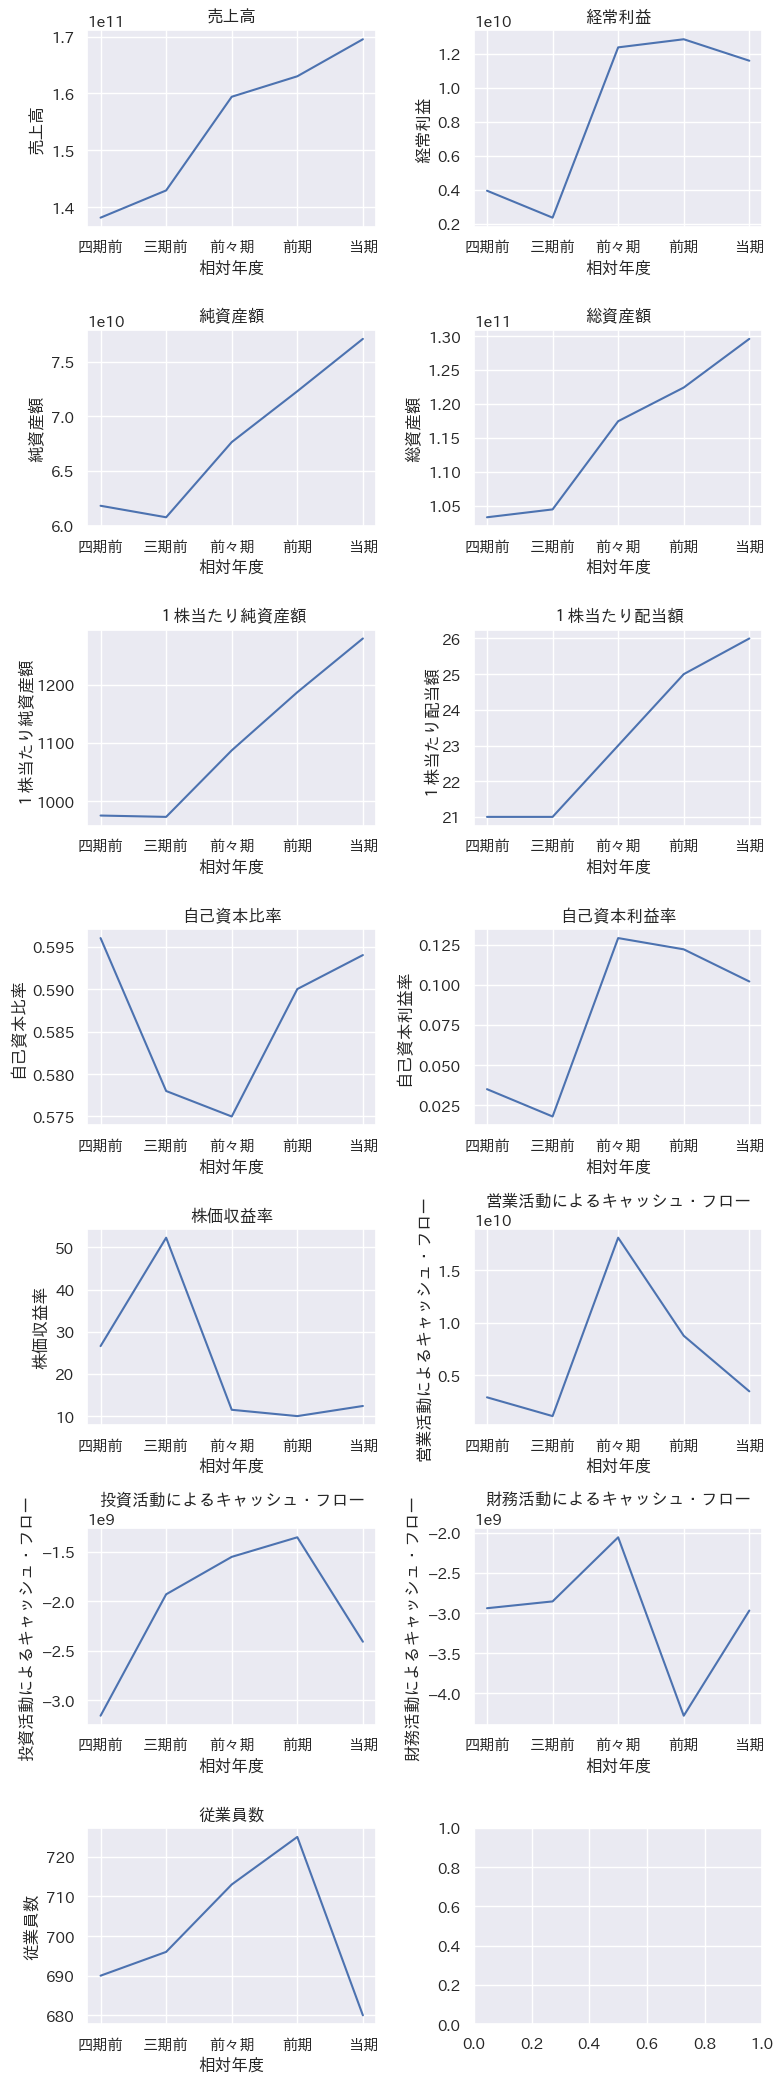

In [85]:
import japanize_matplotlib
sns.set(font="IPAexGothic")
fig, axes = plt.subplots(7, 2, figsize=(8, 21))
i, j = 0, 0
for col in df_rro.columns:
    if col != '相対年度':
        sns.lineplot(data=df_rro, x='相対年度', y=col, ax=axes[j, i])
        axes[j, i].set_title(f'{col}')
    
        if i % 2 == 1:
            i = 0
            j += 1
        else:
            i += 1
plt.tight_layout()
print(i, j)

1 6


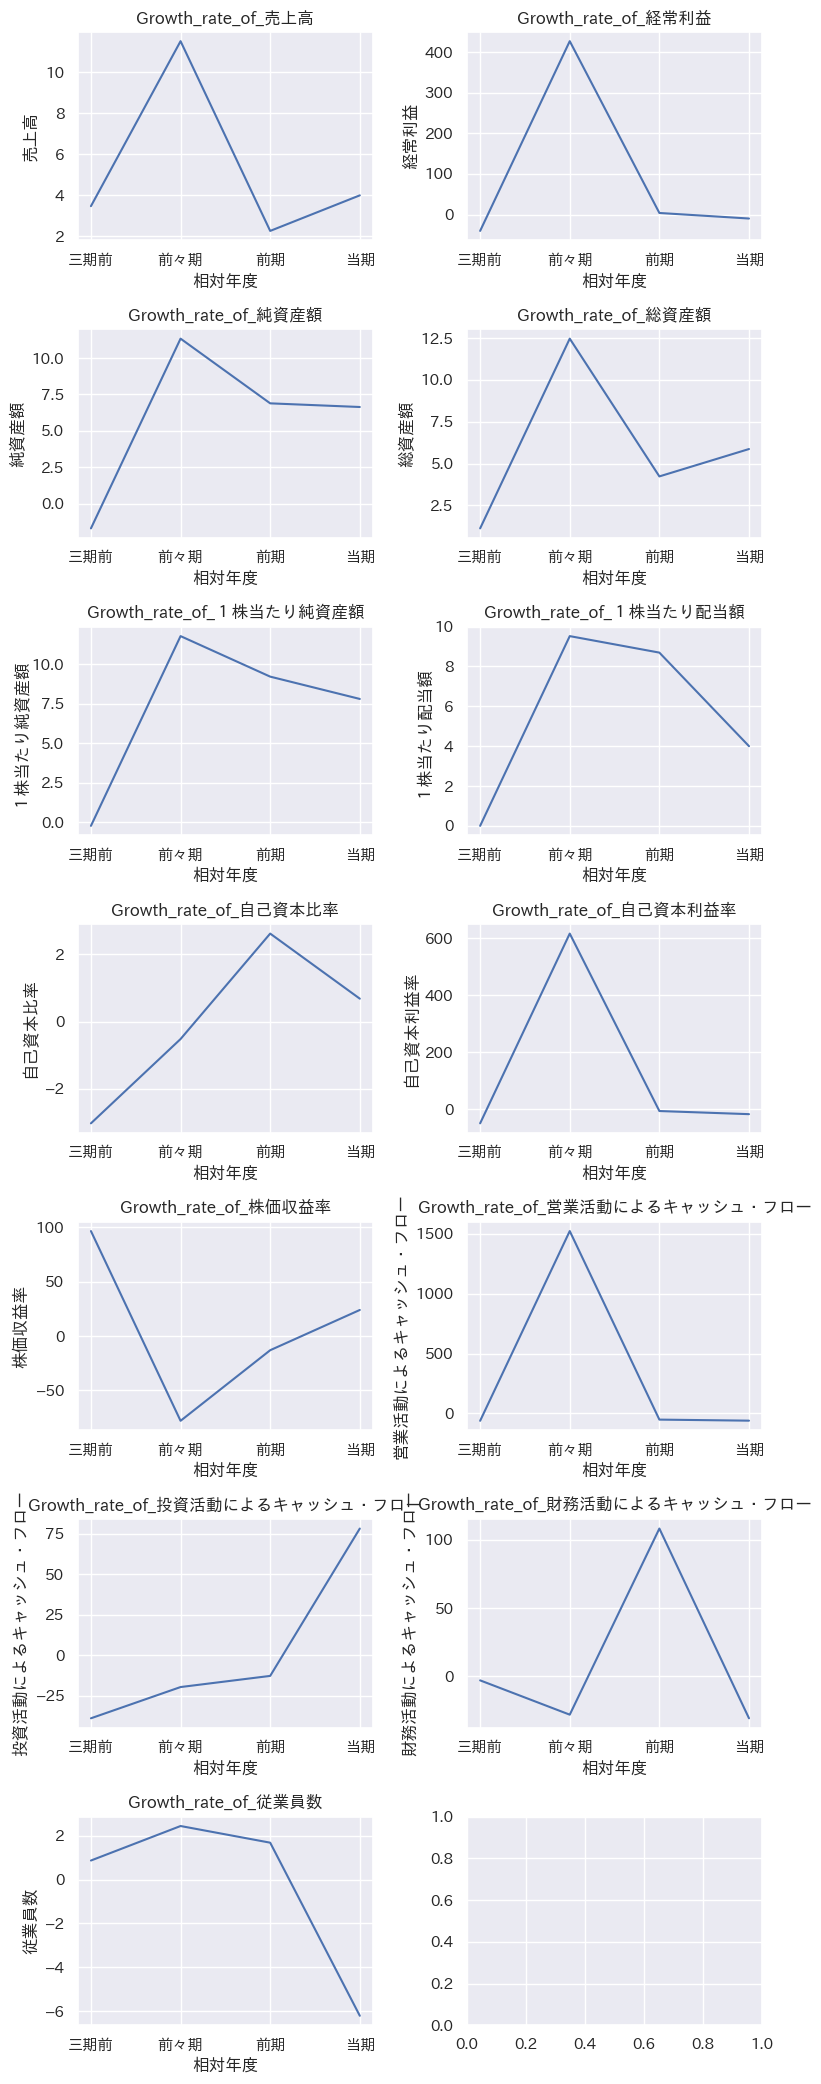

In [87]:
fig, axes = plt.subplots(7, 2, figsize=(8, 21))
i, j = 0, 0
for col in df_rro.columns:
    if col != '相対年度':

        pd.set_option('future.no_silent_downcasting', True)
        # 成長率計算
        growth_rate = df_rro[col].pct_change() * 100

        sns.lineplot(x=df_rro['相対年度'], y=growth_rate, ax=axes[j, i])
        axes[j, i].set_title(f'Growth_rate_of_{col}')
    
        if i % 2 == 1:
            i = 0
            j += 1
        else:
            i += 1
plt.tight_layout()
print(i, j)